In [30]:
import numpy as np
import matplotlib.pyplot as plt
#ode solver
import scipy.integrate as si
from tkinter import *

In [75]:
class lin_cart_and_spring:
    """
    This class creates a class object of a cart and spring system and plots
    the carts linear motion as time moves forward. 
    
    Limits
    -------
    carts = 2
    springs = 3
    """
    
    def __init__(self,k=20,L=1,m=1,x_0=1,y_0=0,b=0.5): 
        """ 
        Parameters
        ----------
        k : sping constant for the first and third springs
        L : length of first spring
        m: mass of first carts
        x_0 : initial position of first cart 
        y_0 : initial velocity of first cart
        b : friction coefficient for first cart
        """
        
        self.k = np.array([k])
        self.L = np.array([L])
        self.m = np.array([m])
        self.x_0 = np.array([x_0])
        self.y_0 = np.array([y_0])
        self.b = np.array([b])
        
        
        self.cart_count = 1
        self.spring_count = 1

    def add_cart(self,m=1,x_0=1,y_0=0,b=0.5):
        """ 
        Parameters
        ----------
        m : mass of new cart
        x_0 : initial position of new cart 
        y_0 : initial velocity of first cart
        b : friction coefficient for new cart
        """
        if x_0 < self.x_0[0]:
            print("Error: Initial position of cart 2 cannot be less than cart 1")
            return
            
        self.m=np.append(self.m,m)
        self.x_0 = np.append(self.x_0,x_0)
        self.y_0 = np.append(self.y_0,y_0)
        self.b = np.append(self.b,b)
        self.cart_count = self.cart_count + 1
        
        
    def add_spring(self,k=20,L=1):
        """ 
        Parameters
        ----------
        k : spring constant for new spring
        L : length of new spring
        """
        self.k = np.append(self.k,k)
        self.L = np.append(self.L,L)
        self.spring_count = self.spring_count + 1
    
    def func_1c1s(state,time,parameters):
        """
        Differential eq for the 1 cart 1 spring system
        
        Parameters
        ----------
        parameters = m_1,k_1,L_1,b_1
        state = x_1,y_1
        """
        m_1,k_1,L_1,b_1 = parameters
        x_1,y_1 = state
        
        #f=x_1',y_1',x_2',y_2'
        f = [y_1,(-b_1*y_1 - k_1*(x_1-L_1))/m_1]
        
        return f
    
    def func_1c2s(state,time,parameters):
        """
        Differential eq for the 1 cart 2 spring system
        
        Parameters
        ----------
        parameters = m_1,k_1,k_2,L_1,L_2,b_1
        state = x_1,y_1
        """
        m_1,k_1,k_2,L_1,L_2,b_1 = parameters
        x_1,y_1 = state
        
        #f=x_1',y_1',x_2',y_2'
        f = [y_1,(-b_1*y_1 - k_1*(x_1-L_1) - k_2*(x_1-L_2))/m_1]
        
        return f
    
    def func_2c2s(state,time,parameters):
        """
        Differential eq for the 2 cart 2 spring system
        
        Parameters
        ----------
        parameters = m_1,m_2,k_1,k_2,L_1,L_2,b_1,b_2
        state = x_1,x_2,y_1,y_2
        """
        m_1,m_2,k_1,k_2,L_1,L_2,b_1,b_2 = parameters
        x_1,y_1,x_2,y_2 = state
        
        #f=x_1',y_1',x_2',y_2'
        f = [y_1,(-b_1*y_1 - k_1*(x_1-L_1) + k_2*(x_2-x_1-L_2))/m_1,
             y_2,(-b_2*y_2 - k_2*(x_2-x_1-L_2))/m_2]
        
        return f
    
    def func_2c3s(state,time,parameters):
        """
        Differential eq for the 2 cart 3 spring system
        
        Parameters
        ----------
        parameters = m_1,m_2,k_1,k_2,k_3,L_1,L_2,L_3,b_1,b_2
        state = x_1,x_2,y_1,y_2
        """
        m_1,m_2,k_1,k_2,k_3,L_1,L_2,L_3,b_1,b_2 = parameters
        x_1,y_1,x_2,y_2 = state
        
        #f=x_1',y_1',x_2',y_2'
        f = [y_1,(-b_1*y_1 - k_1*(x_1-L_1) + k_2*(x_2-x_1-L_2))/m_1,
             y_2,(-b_2*y_2 - k_2*(x_2-x_1-L_2) - k_3*(x_2-L_3))/m_2]
        
        return f
        
    def plot(self,duration):
        """
        Plots static representation of # carts attached to # spring
        assumes constants A are magnitude 1
        
        Parameters
        ----------
        self : currently defined system
        duration : how long plot lasts
        """
        
        if self.cart_count == 1 and self.spring_count == 1:
            #creating times
            t = np.arange(duration,step=0.01)

            #creating arrays to feed the ODE solver
            state = [self.x_0[0],self.y_0[0]]
            parameters = [self.m[0],self.k[0],self.L[0],self.b[0]]
            
            #solving ODES
            soln = si.odeint(lin_cart_and_spring.func_1c1s,state,t,args=(parameters,))
            
            #creating position arrays
            x_1 = soln[:,0]
            
            #plotting 
            plt.plot(t,x_1,color='blue')
            plt.title("1 Cart 1 Spring")
            plt.xlabel("Time (s)")
            plt.ylabel("Postion")
            plt.legend(["Cart 1"])
            
        elif self.cart_count == 1 and self.spring_count == 2:
            #creating times
            t = np.arange(duration,step=0.01)
            
            #creating arrays to feed the ODE solver
            state = [self.x_0[0],self.y_0[0]]
            parameters = [self.m[0],self.k[0],self.k[1],self.L[0],self.L[1],self.b[0]]
            
            #solving ODES
            soln = si.odeint(lin_cart_and_spring.func_1c2s,state,t,args=(parameters,))
            
            #creating position arrays
            x_1 = soln[:,0]
            
            #plotting 
            plt.plot(t,x_1,color='blue')
            plt.title("1 Cart 2 Springs")
            plt.xlabel("Time (s)")
            plt.ylabel("Postion")
            plt.legend(["Cart 1"])

        elif self.cart_count == 2 and self.spring_count == 2:
            #creating times
            t = np.arange(duration,step=0.01)
            
            #creating arrays to feed the ODE solver
            state = [self.x_0[0],self.y_0[0],self.x_0[1],self.y_0[1]]
            parameters = [self.m[0],self.m[1],self.k[0],self.k[1],self.L[0],self.L[1],self.b[0],self.b[1]]
            
            #solving ODES
            soln = si.odeint(lin_cart_and_spring.func_2c2s,state,t,args=(parameters,))
            
            #creating position arrays
            x_1 = soln[:,0]
            x_2 = soln[:,2]
            
            #plotting 
            plt.plot(t,x_1,color='blue')
            plt.plot(t,x_2,color='orange')
            plt.title("2 Carts 2 Springs")
            plt.xlabel("Time (s)")
            plt.ylabel("Postion")
            plt.legend(["Cart 1","Cart 2"])
            
        elif self.cart_count == 2 and self.spring_count == 3:
            #creating times
            t = np.arange(duration,step=0.01)
            
            #creating arrays to feed the ODE solver
            
            state = [self.x_0[0],self.y_0[0],self.x_0[1],self.y_0[1]]
            parameters = [self.m[0],self.m[1],self.k[0],self.k[1],self.k[2],self.L[0],self.L[1],self.L[2],self.b[0],self.b[1]]
            
            #solving ODES
            soln = si.odeint(lin_cart_and_spring.func_2c3s,state,t,args=(parameters,))
            #creating position arrays
            x_1 = soln[:,0]
            x_2 = soln[:,2]
            
            #plotting 
            plt.plot(t,x_1,color='blue')
            plt.plot(t,x_2,color='orange')
            plt.title("2 Carts 3 Springs")
            plt.xlabel("Time (s)")
            plt.ylabel("Postion")
            plt.legend(["Cart 1","Cart 2"])
            
        else:
            print("Too many carts or springs were added to the system. Limit 2 carts and 3 spring")
    
    def display(self):
        """
        Displays the values of the system
        """
        if self.cart_count == 1 and self.spring_count == 1:
            master = Tk()
            #Cart 1
            Label(master,text="CART 1: ").grid(row=0)
            Label(master,text="Mass: " + str(self.m[0])).grid(row=1, column=1)
            Label(master,text="Initial Pos: " + str(self.x_0[0])).grid(row=1, column=2)
            Label(master,text="Initial Velocity: " + str(self.y_0[0])).grid(row=1, column=3)
            Label(master,text="Friction Coef: " + str(self.b[0])).grid(row=1, column=4)
            #Spring 1
            Label(master,text="Spring 1: ").grid(row=3)
            Label(master,text="Spring Constant: " + str(self.k[0])).grid(row=4, column=1)
            Label(master,text="Spring length: " + str(self.L[0])).grid(row=4, column=3)
            
            mainloop( )
           
        elif self.cart_count == 1 and self.spring_count == 2:
            master = Tk()
            #Cart 1
            Label(master,text="CART 1: ").grid(row=0)
            Label(master,text="Mass: " + str(self.m[0])).grid(row=1, column=1)
            Label(master,text="Initial Pos: " + str(self.x_0[0])).grid(row=1, column=2)
            Label(master,text="Initial Velocity: " + str(self.y_0[0])).grid(row=1, column=3)
            Label(master,text="Friction Coef: " + str(self.b[0])).grid(row=1, column=4)
            #Spring 1
            Label(master,text="Spring 1: ").grid(row=3)
            Label(master,text="Spring Constant: " + str(self.k[0])).grid(row=4, column=1)
            Label(master,text="Spring length: " + str(self.L[0])).grid(row=4, column=3)
            #Spring 2
            Label(master,text="Spring 2: ").grid(row=6)
            Label(master,text="Spring Constant: " + str(self.k[1])).grid(row=7, column=1)
            Label(master,text="Spring length: " + str(self.L[1])).grid(row=7, column=3)
            
            mainloop( )
          
        elif self.cart_count == 2 and self.spring_count == 2:
            master = Tk()
            #Cart 1
            Label(master,text="CART 1: ").grid(row=0)
            Label(master,text="Mass: " + str(self.m[0])).grid(row=1, column=1)
            Label(master,text="Initial Pos: " + str(self.x_0[0])).grid(row=1, column=2)
            Label(master,text="Initial Velocity: " + str(self.y_0[0])).grid(row=1, column=3)
            Label(master,text="Friction Coef: " + str(self.b[0])).grid(row=1, column=4)
            #Spring 1
            Label(master,text="Spring 1: ").grid(row=3)
            Label(master,text="Spring Constant: " + str(self.k[0])).grid(row=4, column=1)
            Label(master,text="Spring length: " + str(self.L[0])).grid(row=4, column=3)
            #Spring 2
            Label(master,text="Spring 2: ").grid(row=6)
            Label(master,text="Spring Constant: " + str(self.k[1])).grid(row=7, column=1)
            Label(master,text="Spring length: " + str(self.L[1])).grid(row=7, column=3)
            #Cart 2
            Label(master,text="CART 2: ").grid(row=9)
            Label(master,text="Mass: " + str(self.m[1])).grid(row=10, column=1)
            Label(master,text="Initial Pos: " + str(self.x_0[1])).grid(row=10, column=2)
            Label(master,text="Initial Velocity: " + str(self.y_0[1])).grid(row=10, column=3)
            Label(master,text="Friction Coef: " + str(self.b[1])).grid(row=10, column=4)
            
            mainloop( )
            
        elif self.cart_count == 2 and self.spring_count == 3:
            master = Tk()
            #Cart 1
            Label(master,text="CART 1: ").grid(row=0)
            Label(master,text="Mass: " + str(self.m[0])).grid(row=1, column=1)
            Label(master,text="Initial Pos: " + str(self.x_0[0])).grid(row=1, column=2)
            Label(master,text="Initial Velocity: " + str(self.y_0[0])).grid(row=1, column=3)
            Label(master,text="Friction Coef: " + str(self.b[0])).grid(row=1, column=4)
            #Spring 1
            Label(master,text="Spring 1: ").grid(row=3)
            Label(master,text="Spring Constant: " + str(self.k[0])).grid(row=4, column=1)
            Label(master,text="Spring length: " + str(self.L[0])).grid(row=4, column=3)
            #Spring 2
            Label(master,text="Spring 2: ").grid(row=6)
            Label(master,text="Spring Constant: " + str(self.k[1])).grid(row=7, column=1)
            Label(master,text="Spring length: " + str(self.L[1])).grid(row=7, column=3)
            #Cart 2
            Label(master,text="CART 2: ").grid(row=9)
            Label(master,text="Mass: " + str(self.m[1])).grid(row=10, column=1)
            Label(master,text="Initial Pos: " + str(self.x_0[1])).grid(row=10, column=2)
            Label(master,text="Initial Velocity: " + str(self.y_0[1])).grid(row=10, column=3)
            Label(master,text="Friction Coef: " + str(self.b[1])).grid(row=10, column=4)
            #Spring 3
            Label(master,text="Spring 3: ").grid(row=12)
            Label(master,text="Spring Constant: " + str(self.k[2])).grid(row=13, column=1)
            Label(master,text="Spring length: " + str(self.L[2])).grid(row=13, column=3)
            
            mainloop( )
        

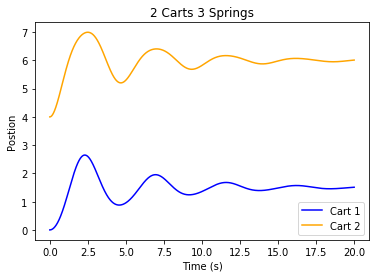

In [76]:
system_1 = lin_cart_and_spring(k=10,L=2,m=5,x_0=0,y_0=0,b=1) #cart 1 and spring 1

system_1.add_spring(k=10,L=5) #spring 2
system_1.add_cart(m=3,x_0=4,y_0=0,b=2) #cart 2
system_1.add_spring(k=5,L=5) #spring 3

system_1.plot(20)

system_1.display()